In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Q1

(a)<br>
$\gamma(k-1) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+(k-1)}\}$<br>
$\gamma(k-2) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+(k-2)}\}$<br>
$\gamma(k) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, Y_{t+k}\}$<br>
$\because Y_{t+k} - \mu = \phi_1(Y_{t+(k-1)} - \mu) + \phi_2(Y_{t+(k-2)} - \mu) + \epsilon_{t+k}$<br>
$\therefore \gamma(k) = Cov\{\phi_1(Y_{t-1}-\mu)+\phi_2(Y_{t-2}-\mu)+\epsilon_t, \phi_1(Y_{t+(k-1)} - \mu) + \phi_2(Y_{t+(k-2)} - \mu) + \epsilon_{t+k}\}$<br>
$\therefore \gamma(k) = \phi_1\gamma(k-1) + \phi_2\gamma(k-2)$<br>
$\therefore \rho(k)=\phi_1\rho(k-1)+\phi_2\rho(k-2)$<br>

(b)<br>
$\rho(1)=\phi_1\rho(0)+\phi_2\rho(-1)=\phi_1+\phi_2\rho(1)$<br>
$\rho(2)=\phi_1\rho(0)\rho(1)+\phi_2\rho(0)=\phi_1\rho(1)+\phi_2$<br>
$$
\begin{pmatrix}
\rho(1) \\
\rho(2) 
\end{pmatrix}=\begin{pmatrix}
1 & \rho(1) \\
\rho(1) & 1 
\end{pmatrix}\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}
$$

(c)<br>
$$
\begin{pmatrix}
0.4 \\
0.2 
\end{pmatrix}=\begin{pmatrix}
1 & 0.4 \\
0.4 & 1 
\end{pmatrix}\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}
$$
$
\because \begin{pmatrix}
1 & 0.4 \\
0.4 & 1 
\end{pmatrix}^{-1}=\begin{pmatrix}
\frac{1}{0.84} & \frac{-0.4}{0.84} \\
\frac{-0.4}{0.84} & \frac{1}{0.84} 
\end{pmatrix}
$<br>
$\therefore
\begin{pmatrix}
\frac{1}{0.84} & \frac{-0.4}{0.84} \\
\frac{-0.4}{0.84} & \frac{1}{0.84} 
\end{pmatrix}\begin{pmatrix}
0.4 \\
0.2 
\end{pmatrix}=\begin{pmatrix}
\phi_1 \\
\phi_2 
\end{pmatrix}=\begin{pmatrix}
\frac{8}{21} \\
\frac{1}{21}
\end{pmatrix}
$<br>
$\therefore \rho(3)=\frac{8}{21} 0.4 + \frac{1}{21} 0.2=\frac{17}{105}\approx0.162$

Q2

d=1 is recommended. <br>
We could observe that past effects could not die out when d=0 according to ACF graph. All lags are significant. When d=1, in the left graph, we could observe stationarity and only lag=1 matters in ACF plot, for which the process is ergodic so stationary. When d=2, it is over differencing, no improvement on ACF and more past effects impact the results.

Q5

$
x_t=\phi_1L x_t + \phi_2L^2 x_t + \epsilon_t
$<br>
$
x_t(1-\phi_1L-\phi_2L^2)=\epsilon_t=x_t(1-\lambda_1L)(1-\lambda_2L)
$<br>
To let the process be stationary and ergodic, $\phi_1$ and $\phi_2$ need to ensure the absolute value of roots of equation $\Phi(z)=1-\phi_1z-\phi_2z^2$ would be larger than 1<br>
if real roots $\phi_1^2 + 4\phi_2 > 0$<br>
if $\phi_2 < 0$<br>
$\phi_1+\phi_2 < 1, \frac{\phi_1}{-2\phi_2} > 1$<br>
if $\phi_2 > 0$<br>
$\phi_1+\phi_2 < 1, -\phi_1+\phi_2 < 1$<br>
if complex roots $\phi_1^2 + 4\phi_2 < 0$<br>
$1 < \phi_2 < 0$<br>


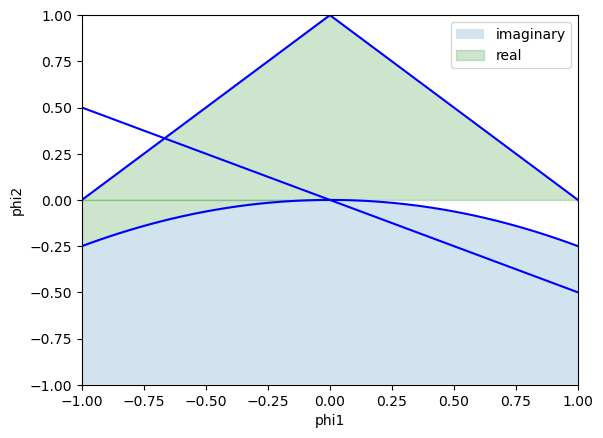

In [38]:
def f1(x):
   return -x**2/4
def f2(x):
   return 1-x
def f3(x):
   return 1+x
def f4(x):
   return -x/2
def f5(x):
   return -1
def f6(x):
   return 0
x = np.linspace(-1, 1, 100)

plt.plot(x, f1(x), color="blue")
plt.plot(x, f2(x), color="blue")
plt.plot(x, f3(x), color="blue")
plt.plot(x, f4(x), color="blue")
plt.ylim((-1,1))
plt.xlim((-1,1))
plt.xlabel("phi1")
plt.ylabel("phi2")
plt.fill_between(x, f1(x), f5(x), alpha=0.2, label="imaginary")
plt.fill_between(x, 0, np.min([f2(x), f3(x)], axis=0), alpha=0.2, label="real", color="green")
plt.fill_between(x, f1(x), np.min([f2(x), f4(x),np.zeros(len(x))], axis=0), where=np.min([f2(x), f4(x),np.zeros(len(x))], axis=0)>f1(x), alpha=0.2, color="green")
plt.legend()
plt.show()

Q6

In [32]:
def generate_ar_1_process(T, white_noise_mu, white_noise_sigma):
    output = {}
    for num in range(5):
        paths = {str(phi): [0] for phi in [0.9,0.99,0.99999,1.0]}
        epsilons = np.random.normal(white_noise_mu, white_noise_sigma, T)
        for i in range(T):
            for phi in [0.9,0.99,0.99999,1.0]:
                paths[str(phi)].append(paths[str(phi)][-1]*phi+epsilons[i])
        output[num] = paths
    return output

def plot_sample_paths(T):
    output = generate_ar_1_process(T, 0, 1)
    
    print(f"----------------------plots for T={T}----------------------")
    for phi in [0.9,0.99,0.99999,1.0]:
        for num in range(5):
            plt.plot(output[num][str(phi)], label=f"sample={num+1}")
        plt.legend()
        plt.title(f"T={T}, phi={phi}")
        plt.ylim((-100,100))
        plt.show()
    print(f"----------------------population stats for T={T}----------------------")
    for phi in [0.9,0.99,0.99999,1.0]:
        print(f"phi={phi}")
        print(f"population mean=0 and std={np.sqrt(1/(1-phi**2)) if phi != 1 else 'NA'}")
        print("sample mean=", np.mean([output[num][str(phi)] for num in range(5)]),"| sample std=", np.std([output[num][str(phi)] for num in range(5)]))
        print()
    print()
    

----------------------plots for T=100----------------------


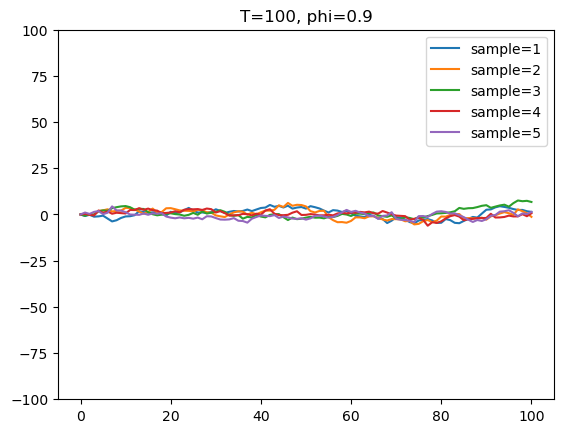

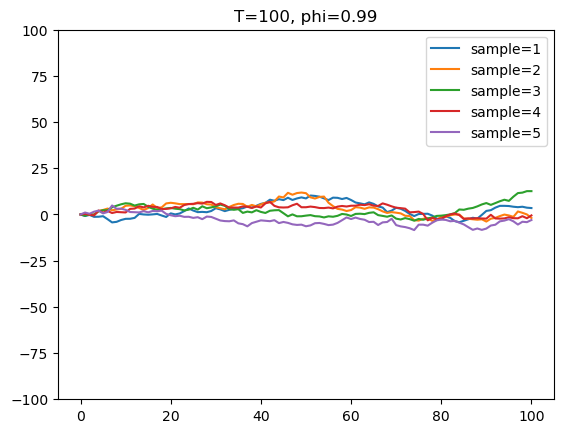

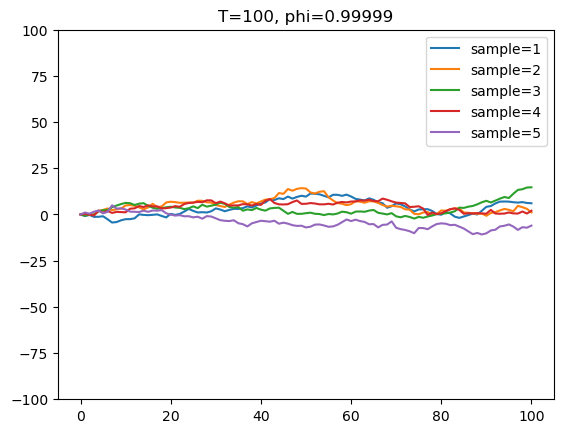

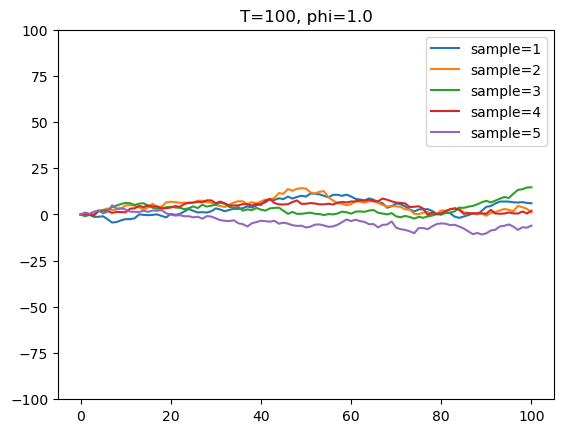

----------------------population stats for T=100----------------------
phi=0.9
population mean=0 and std=2.294157338705618
sample mean= 0.1958443525858061 | sample std= 2.330382943218403

phi=0.99
population mean=0 and std=7.088812050083353
sample mean= 1.449053865720872 | sample std= 4.080607494167131

phi=0.99999
population mean=0 and std=223.60735676962474
sample mean= 2.432258355246268 | sample std= 4.79119425926948

phi=1.0
population mean=0 and std=NA
sample mean= 2.4335858016959575 | sample std= 4.792219017690683


----------------------plots for T=1000----------------------


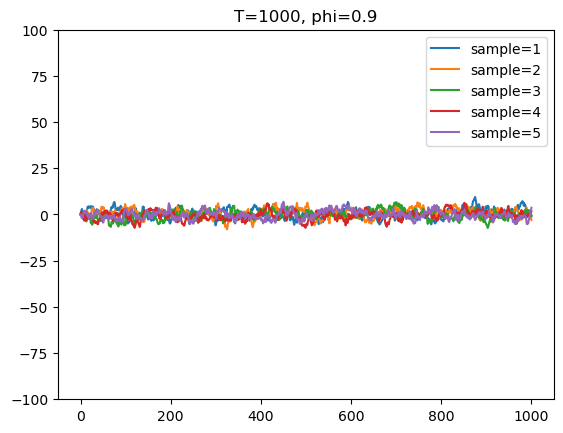

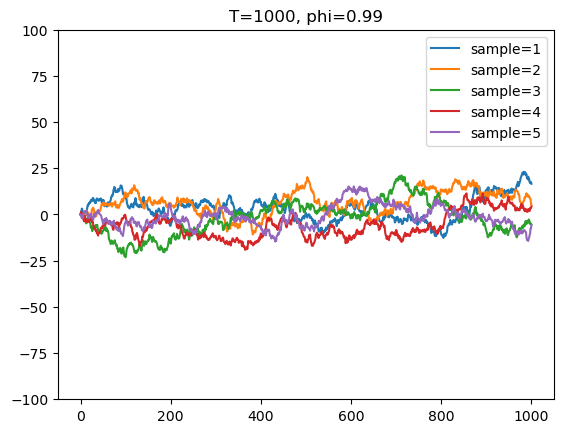

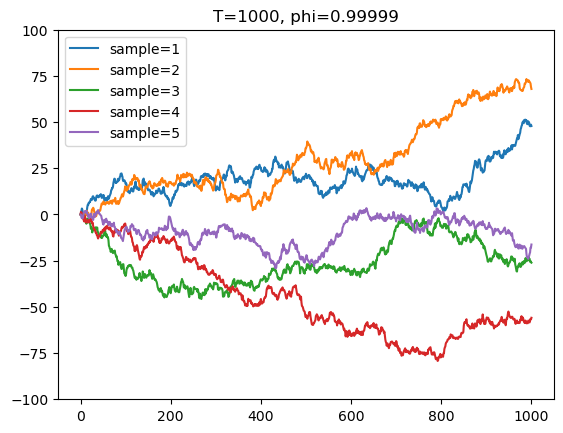

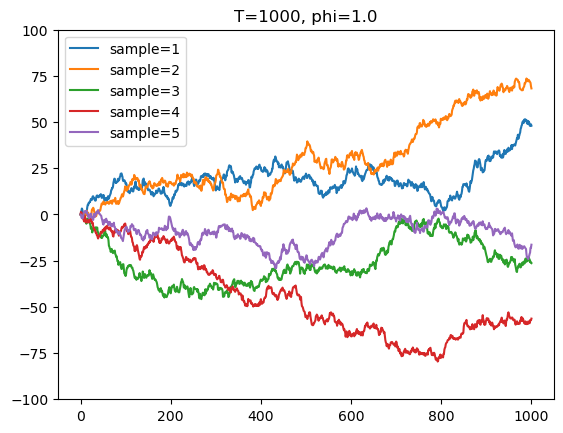

----------------------population stats for T=1000----------------------
phi=0.9
population mean=0 and std=2.294157338705618
sample mean= 0.03294534379649063 | sample std= 2.3954674621170855

phi=0.99
population mean=0 and std=7.088812050083353
sample mean= 0.054703851082286474 | sample std= 8.254151381718776

phi=0.99999
population mean=0 and std=223.60735676962474
sample mean= -6.286391658622617 | sample std= 31.643397070162123

phi=1.0
population mean=0 and std=NA
sample mean= -6.322811953794051 | sample std= 31.763102760070144


----------------------plots for T=10000----------------------


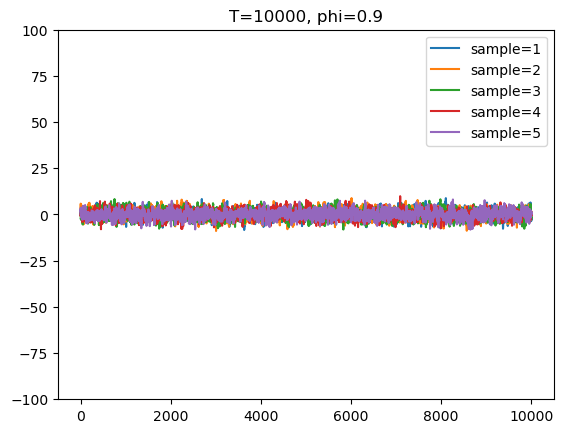

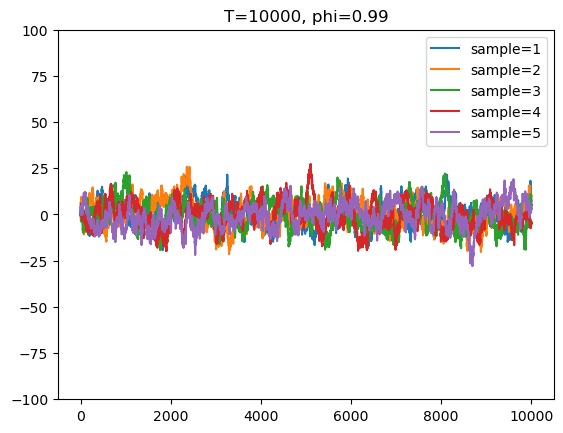

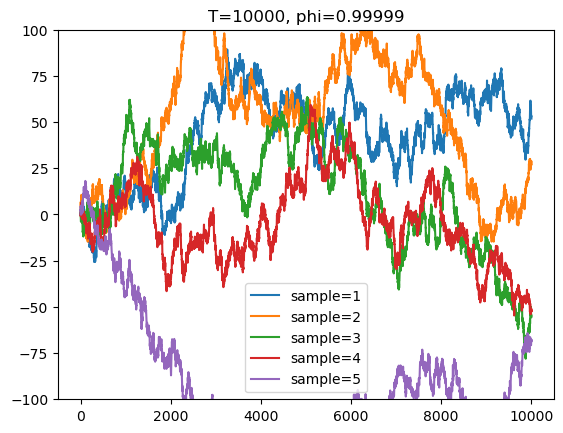

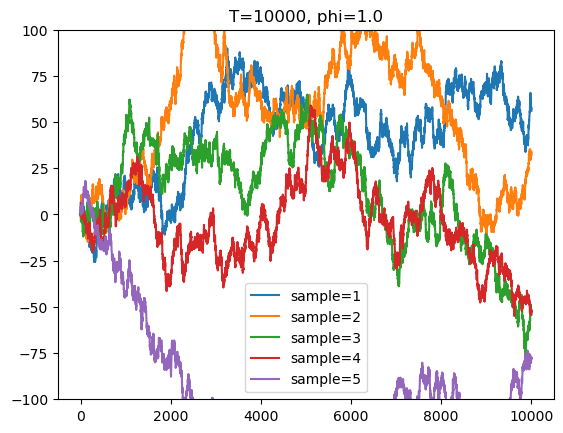

----------------------population stats for T=10000----------------------
phi=0.9
population mean=0 and std=2.294157338705618
sample mean= -0.01848194394834325 | sample std= 2.296503692595538

phi=0.99
population mean=0 and std=7.088812050083353
sample mean= -0.22694685243187382 | sample std= 7.067655141382076

phi=0.99999
population mean=0 and std=223.60735676962474
sample mean= 1.2284685687931196 | sample std= 60.177845945295445

phi=1.0
population mean=0 and std=NA
sample mean= 1.4528191394938201 | sample std= 62.4692760835265




In [33]:
plot_sample_paths(100)
plot_sample_paths(1000)
plot_sample_paths(10000)

We could observe that as $\phi$ gets closer to 1, the stationarity would worsen, as is suggested by the increasing gap between sample mean and standard deviation against population statistics. And as T increases, due to larger sample, with $\phi$ further from 1, sample moments gets closer to population, as is shown in T=10,000 case. 